In [ ]:
import os
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
results_dir = 'test_samples_ampnorm'
pattern = re.compile(r'SNR_(\d+.\d+)-GD_(\d+.\d+)\.wav')

pGD_list, pSNR_list = [], []

for speaker in tqdm(os.listdir(results_dir)):
    speaker_dir = os.path.join(results_dir, speaker)
    
    if os.path.isdir(speaker_dir):        
        for filename in os.listdir(speaker_dir):
            match = pattern.match(filename)
            if match:
                pSNR = float(match.group(1))
                pGD = float(match.group(2))
                pSNR_list.append(pSNR)
                pGD_list.append(pGD)

100%|██████████| 50/50 [00:00<00:00, 6826.67it/s]


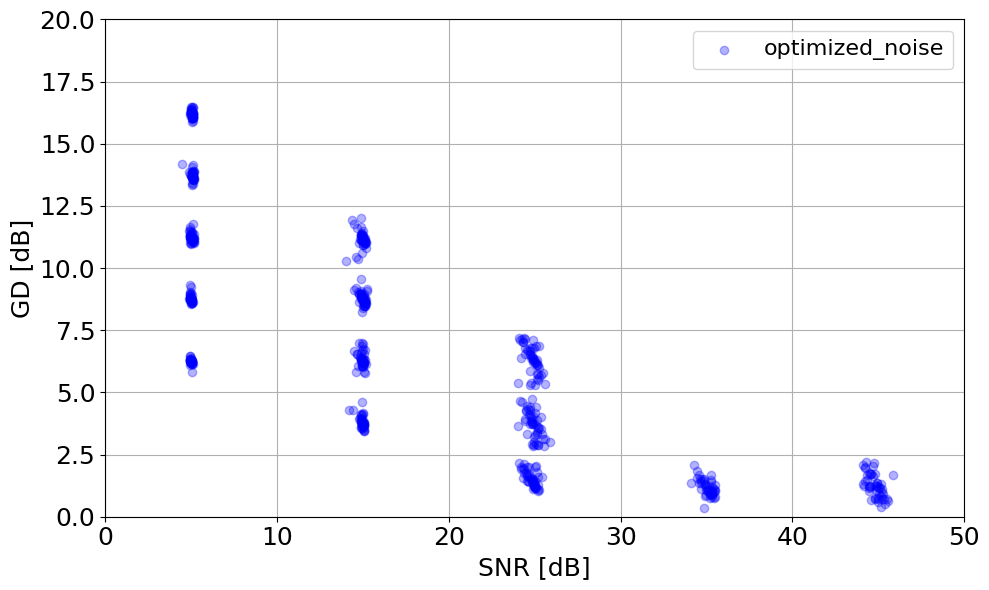

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pSNR_list, pGD_list, c='blue', alpha=0.3, label='optimized_noise')
plt.xlabel('SNR [dB]', fontsize=18)
plt.ylabel('GD [dB]', fontsize=18)
plt.xlim(0, 50)
plt.ylim(0, 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("3-1.noise.pdf", format="pdf")
plt.show()
plt.close()